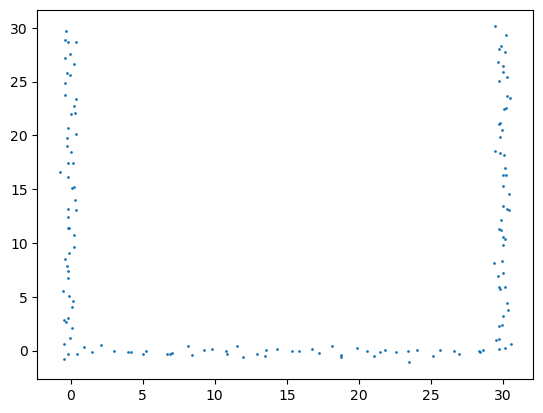

In [1]:
from scipy.stats import multivariate_normal
import numpy as np

import matplotlib.pyplot as plt
from track_linearization import make_track_graph

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.1).rvs(position.shape)

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

plt.scatter(position[:, 0], position[:, 1], s=1, label="observations")

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


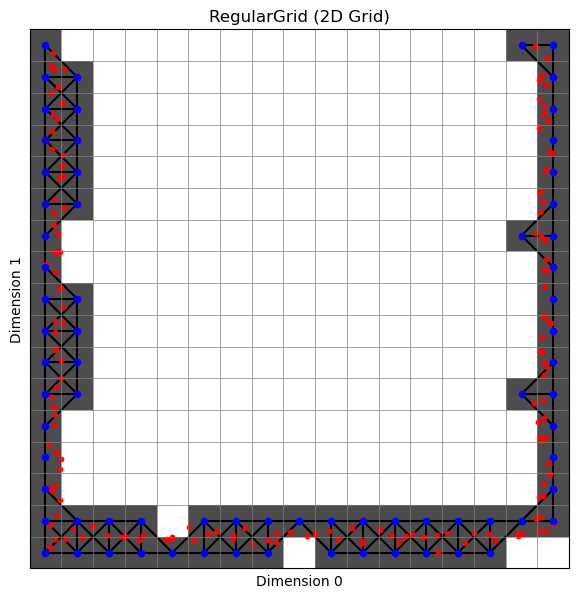

In [2]:
from non_local_detector import Environment

grid_env = Environment.from_samples(position)
grid_env.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

In [3]:
grid_env.boundary_bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [4]:
grid_env.bin_attributes

,source_grid_flat_index,original_grid_nd_index,pos_dim0,pos_dim1
active_bin_id,,,,
0,0,"(0, 0)",-0.752582,-1.131828
1,1,"(0, 1)",-0.752582,0.822846
2,2,"(0, 2)",-0.752582,2.777519
3,3,"(0, 3)",-0.752582,4.732193
4,4,"(0, 4)",-0.752582,6.686867
...,...,...,...,...
67,284,"(16, 12)",30.557812,22.324257
68,285,"(16, 13)",30.557812,24.278930
69,286,"(16, 14)",30.557812,26.233604


In [5]:
grid_env.edge_attributes

distance                                     vector  \
source_bin target_bin                                                        
0          1           1.954674                  (0.0, 1.9546737335741677)   
           17          1.956900                  (1.9568996454526788, 0.0)   
           18          2.765901   (1.9568996454526788, 1.9546737335741677)   
1          2           1.954674                  (0.0, 1.9546737335741675)   
           17          2.765901  (1.9568996454526788, -1.9546737335741677)   
...                         ...                                        ...   
66         67          1.954674                  (0.0, 1.9546737335741682)   
67         68          1.954674                  (0.0, 1.9546737335741682)   
68         69          1.954674                  (0.0, 1.9546737335741682)   
69         70          1.954674                  (0.0, 1.9546737335741682)   
70         71          1.954674                  (0.0, 1.9546737335741682)   

                       angle_2d  edge_id  
source_bin target_bin                     
0          1           1.570796        0  
           17          0.000000        1  
           18          0.784829        2  
1          2           1.570796        3  
           17         -0.784829        4  
...                         ...      ...  
66         67          1.570796      133  
67         68          1.570796      134  
68         69          1.570796      135  
69         70          1.570796      136  
70         71          1.570796      137  

[138 rows x 4 columns]

In [6]:
grid_env.dimension_ranges

((np.float64(-1.73103177509318), np.float64(31.536262197602362)),
 (np.float64(-2.1091649889810347), np.float64(31.120288481779816)))

In [7]:
grid_env.bin_sizes

array([3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034, 3.82510034, 3.82510034, 3.82510034,
       3.82510034, 3.82510034])

In [8]:
try:
    grid_env.to_linear(position[[0]])
except TypeError as e:
    print(e)

Linearized coordinate only for GraphLayout environments.


In [9]:
grid_env.active_mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False

In [10]:
grid_env.bin_at(position[[0]])

array([16])

In [11]:
grid_env.neighbors(0)

[1, 17, 18]

In [12]:
grid_env.contains(position[[0]])

array([ True])

In [13]:
grid_env.distance_between(position[[0]], position[[10]])

5.8640212007225045

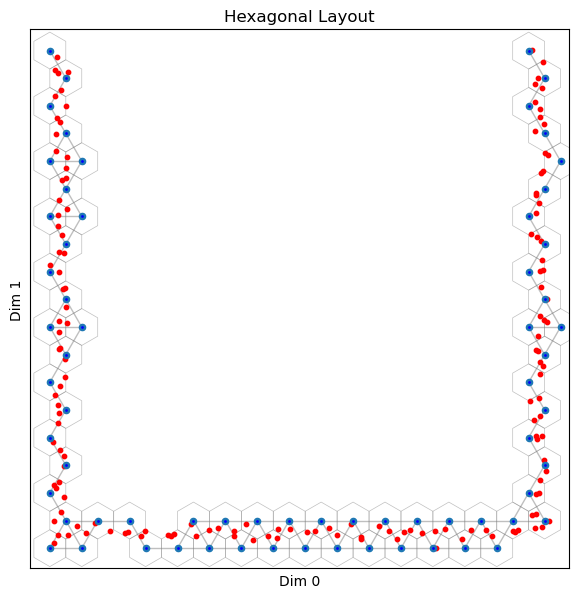

In [14]:
from non_local_detector import Environment

hex_env = Environment.from_samples(position, hexagon_width=5, layout_kind="Hexagonal")
hex_env.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

In [15]:
hex_env.grid_shape

(20, 17)

In [16]:
hex_env

Environment(name='', layout_type='Hexagonal', n_dims=2, active_bins=67, fitted=True)

In [17]:
try:
    hex_env.linear_to_nd(0)
except TypeError as e:
    print(e)

Mapping linear to N-D only for GraphLayout environments.


In [18]:
hex_env.active_mask

array([[ True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False],
       [ True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False],
       [ True, False, False, False, False, False

In [19]:
hex_env.active_mask.shape

(20, 17)

In [20]:
hex_env.bin_attributes

,source_grid_flat_index,original_grid_nd_index,pos_dim0,pos_dim1
active_bin_id,,,,
0,0,"(0, 0)",-0.731032,-1.109165
1,1,"(0, 1)",1.268968,-1.109165
2,3,"(0, 3)",5.268968,-1.109165
3,4,"(0, 4)",7.268968,-1.109165
4,5,"(0, 5)",9.268968,-1.109165
...,...,...,...,...
62,287,"(16, 15)",29.268968,26.603648
63,289,"(17, 0)",0.268968,28.335699
64,304,"(17, 15)",30.268968,28.335699


In [21]:
hex_env.edge_attributes

distance                      vector  angle_2d  edge_id
source_bin target_bin                                                         
0          1                2.0                  (2.0, 0.0)  0.000000        0
           14               2.0   (1.0, 1.7320508075688772)  1.047198        1
1          14               2.0  (-1.0, 1.7320508075688772)  2.094395        2
           15               2.0   (1.0, 1.7320508075688772)  1.047198        3
2          3                2.0                  (2.0, 0.0)  0.000000        4
...                         ...                         ...       ...      ...
60         62               2.0  (-1.0, 1.7320508075688785)  2.094395       92
61         63               2.0   (1.0, 1.7320508075688785)  1.047198       93
62         64               2.0   (1.0, 1.7320508075688785)  1.047198       94
63         65               2.0   (-1.0, 1.732050807568875)  2.094395       95
64         66               2.0   (-1.0, 1.732050807568875)  2.094395       96

[97 rows x 4 columns]

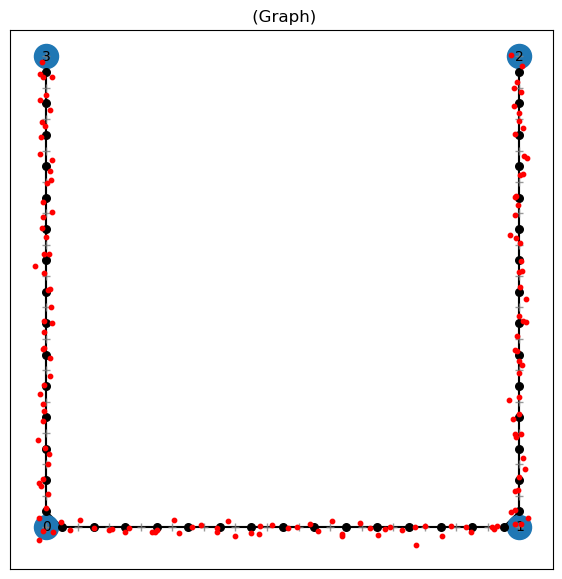

In [22]:
graph_env = Environment.from_graph(graph=track_graph, edge_order=edges, edge_spacing=10.0, bin_size=2.0)
graph_env.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", s=10, zorder=10)

In [23]:
graph_env.is_1d

True

In [24]:
graph_env.active_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [25]:
graph_env.bin_centers

array([[ 1.,  0.],
       [ 3.,  0.],
       [ 5.,  0.],
       [ 7.,  0.],
       [ 9.,  0.],
       [11.,  0.],
       [13.,  0.],
       [15.,  0.],
       [17.,  0.],
       [19.,  0.],
       [21.,  0.],
       [23.,  0.],
       [25.,  0.],
       [27.,  0.],
       [29.,  0.],
       [30.,  0.],
       [ 0.,  1.],
       [ 0.,  3.],
       [ 0.,  5.],
       [ 0.,  7.],
       [ 0.,  9.],
       [ 0., 11.],
       [ 0., 13.],
       [ 0., 15.],
       [ 0., 17.],
       [ 0., 19.],
       [ 0., 21.],
       [ 0., 23.],
       [ 0., 25.],
       [ 0., 27.],
       [ 0., 29.],
       [ 0., 30.],
       [30.,  1.],
       [30.,  3.],
       [30.,  5.],
       [30.,  7.],
       [30.,  9.],
       [30., 11.],
       [30., 13.],
       [30., 15.],
       [30., 17.],
       [30., 19.],
       [30., 21.],
       [30., 23.],
       [30., 25.],
       [30., 27.],
       [30., 29.]])

In [26]:
graph_env.connectivity

In [27]:
graph_env.name

''

In [28]:
graph_env.dimension_ranges

((np.float64(0.0), np.float64(30.0)), (np.float64(0.0), np.float64(30.0)))

In [29]:
graph_env.shortest_path(0, 20)

[0, 15, 16, 17, 18, 19, 20]

In [30]:
graph_env.to_linear(position[[0]])

array([69.66713282])

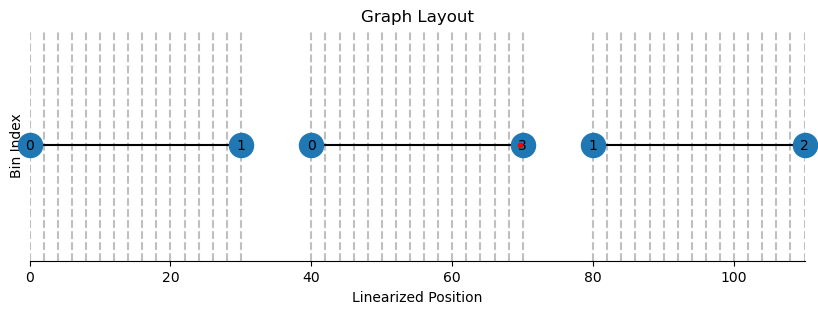

In [31]:
ax = graph_env.plot_1D()
pos_1D = graph_env.to_linear(position[[0]])
plt.scatter(pos_1D[0], 0.0, color="red", s=10, zorder=10)

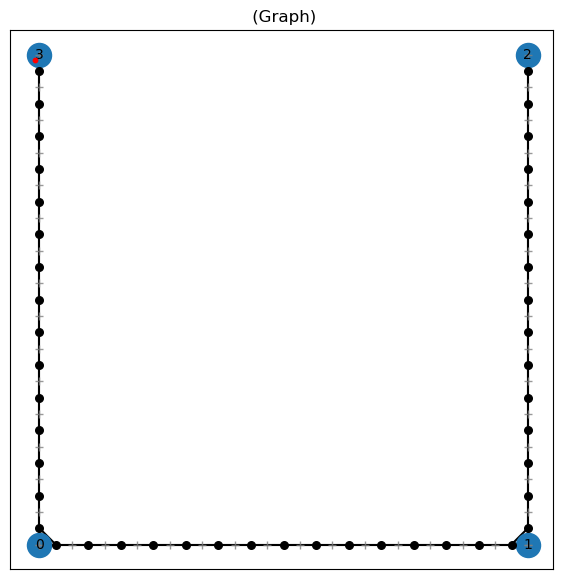

In [32]:
ax = graph_env.plot()
ax.scatter(position[0, 0], position[0, 1], color="red", s=10, zorder=10)


In [33]:
graph_env.bin_at(position[0])

array([29], dtype=int32)

In [34]:
graph_env.bin_sizes

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [35]:
graph_env.bin_attributes

,source_grid_flat_index,original_grid_nd_index,pos_1D,source_edge_id,pos_dim0,pos_dim1
active_bin_id,,,,,,
0,0,"(0,)",1.0,0,1.0,0.0
1,1,"(1,)",3.0,0,3.0,0.0
2,2,"(2,)",5.0,0,5.0,0.0
3,3,"(3,)",7.0,0,7.0,0.0
4,4,"(4,)",9.0,0,9.0,0.0
5,5,"(5,)",11.0,0,11.0,0.0
6,6,"(6,)",13.0,0,13.0,0.0
7,7,"(7,)",15.0,0,15.0,0.0
8,8,"(8,)",17.0,0,17.0,0.0


In [36]:
graph_env.edge_attributes

distance        vector  angle_2d  edge_id
source_bin target_bin                                           
0          1           2.000000   (-2.0, 0.0)  3.141593        0
           15          1.414214   (1.0, -1.0) -0.785398        1
1          2           2.000000   (-2.0, 0.0)  3.141593        2
2          3           2.000000   (-2.0, 0.0)  3.141593        3
3          4           2.000000   (-2.0, 0.0)  3.141593        4
4          5           2.000000   (-2.0, 0.0)  3.141593        5
5          6           2.000000   (-2.0, 0.0)  3.141593        6
6          7           2.000000   (-2.0, 0.0)  3.141593        7
7          8           2.000000   (-2.0, 0.0)  3.141593        8
8          9           2.000000   (-2.0, 0.0)  3.141593        9
9          10          2.000000   (-2.0, 0.0)  3.141593       10
10         11          2.000000   (-2.0, 0.0)  3.141593       11
11         12          2.000000   (-2.0, 0.0)  3.141593       12
12         13          2.000000   (-2.0, 0.0)  3.141593       13
13         14          2.000000   (-2.0, 0.0)  3.141593       14
14         30          1.414214  (-1.0, -1.0) -2.356194       15
15         16          2.000000   (0.0, -2.0) -1.570796       16
16         17          2.000000   (0.0, -2.0) -1.570796       17
17         18          2.000000   (0.0, -2.0) -1.570796       18
18         19          2.000000   (0.0, -2.0) -1.570796       19
19         20          2.000000   (0.0, -2.0) -1.570796       20
20         21          2.000000   (0.0, -2.0) -1.570796       21
21         22          2.000000   (0.0, -2.0) -1.570796       22
22         23          2.000000   (0.0, -2.0) -1.570796       23
23         24          2.000000   (0.0, -2.0) -1.570796       24
24         25          2.000000   (0.0, -2.0) -1.570796       25
25         26          2.000000   (0.0, -2.0) -1.570796       26
26         27          2.000000   (0.0, -2.0) -1.570796       27
27         28          2.000000   (0.0, -2.0) -1.570796       28
28         29          2.000000   (0.0, -2.0) -1.570796       29
30         31          2.000000   (0.0, -2.0) -1.570796       30
31         32          2.000000   (0.0, -2.0) -1.570796       31
32         33          2.000000   (0.0, -2.0) -1.570796       32
33         34          2.000000   (0.0, -2.0) -1.570796       33
34         35          2.000000   (0.0, -2.0) -1.570796       34
35         36          2.000000   (0.0, -2.0) -1.570796       35
36         37          2.000000   (0.0, -2.0) -1.570796       36
37         38          2.000000   (0.0, -2.0) -1.570796       37
38         39          2.000000   (0.0, -2.0) -1.570796       38
39         40          2.000000   (0.0, -2.0) -1.570796       39
40         41          2.000000   (0.0, -2.0) -1.570796       40
41         42          2.000000   (0.0, -2.0) -1.570796       41
42         43          2.000000   (0.0, -2.0) -1.570796       42
43         44          2.000000   (0.0, -2.0) -1.570796       43

In [37]:
graph_env

Environment(name='', layout_type='Graph', n_dims=2, active_bins=47, fitted=True)

In [38]:
hex_env.regions.add(
    name="test_region",
    point=position[0],
)

Region(name='test_region', kind='point', data=array([-0.2908871 , 29.66713282]))

In [39]:
hex_env.regions.area("test_region")

0.0

In [40]:
hex_env.regions["test_region"]

Region(name='test_region', kind='point', data=array([-0.2908871 , 29.66713282]))

In [41]:
hex_env.regions.list_names()

['test_region']

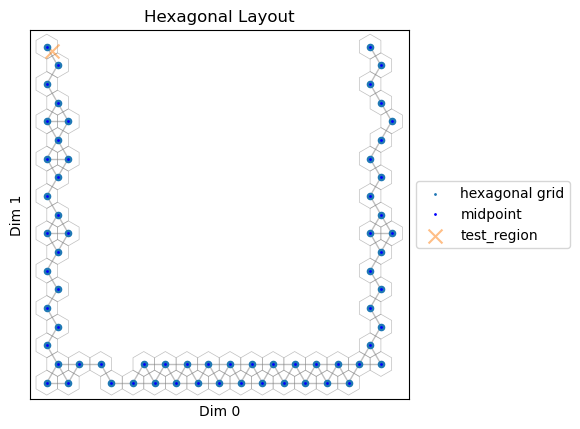

In [42]:
from non_local_detector.environment.regions import plot_regions

fig, ax = plt.subplots()
hex_env.plot(ax=ax)
plot_regions(
    ax=ax,
    regions=hex_env.regions,
)

In [43]:
from shapely.geometry import Polygon

polygon = Polygon(
    [
        (-5, -5),
        (10, -5),
        (10, 10),
        (-5, 10),
    ]
)
hex_env.regions.add(
    name="polygon_region",
    polygon=polygon,
)
hex_env.regions.area("polygon_region")

225.0

In [44]:
polygon2 = Polygon(
    [
        (0, 0),
        (5, 0),
        (5, 5),
        (0, 5),
    ]
)
hex_env.regions.add(
    name="polygon_region2",
    polygon=polygon2,
)

Region(name='polygon_region2', kind='polygon', data=<POLYGON ((0 0, 5 0, 5 5, 0 5, 0 0))>)

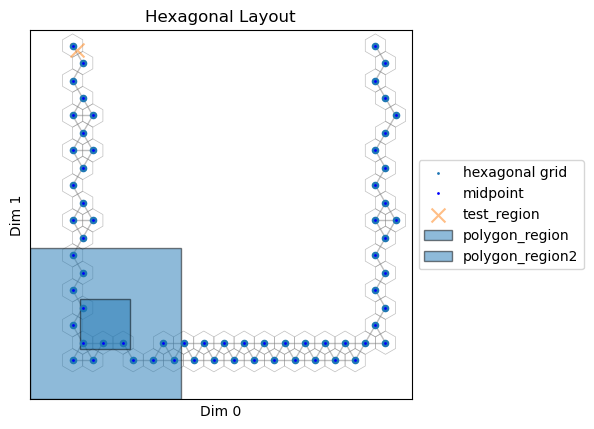

In [45]:
fig, ax = plt.subplots()
hex_env.plot(ax=ax)
plot_regions(
    ax=ax,
    regions=hex_env.regions,
)

In [46]:
hex_env.regions

Regions(test_region(point), polygon_region(polygon), polygon_region2(polygon))

In [47]:
hex_env.bins_in_region("polygon_region")

array([ 0,  1,  2,  3,  4, 14, 15, 16, 17, 29, 31, 33, 35, 37])

In [48]:
hex_env.bins_in_region("polygon_region2")

array([14, 15, 16, 31])

In [49]:
hex_env.bins_in_region("test_region")

array([65])

In [50]:
hex_env.shortest_path(0, 10)

[0, 14, 15, 16, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [51]:
from non_local_detector.environment import get_layout_parameters, list_available_layouts
list_available_layouts()

['Graph',
 'Hexagonal',
 'ImageMask',
 'MaskedGrid',
 'RegularGrid',
 'ShapelyPolygon',
 'TriangularMesh']

In [52]:
get_layout_parameters("TriangularMesh")

{'boundary_polygon': {'annotation': 'Polygon',
  'default': None,
  'kind': 'positional or keyword'},
 'point_spacing': {'annotation': 'float',
  'default': None,
  'kind': 'positional or keyword'}}

In [53]:
# --- Define the Shapely Polygon for the U-shaped corridor ---
corridor_half_width = 3.0
w = corridor_half_width

# Define vertices for the U-shape polygon
# Starting from outer top-left, going clockwise around the outside,
# then counter-clockwise around the inside of the U opening.
u_shape_exterior_coords = [
    (-w, 30.0 + w),  # P1: Outer Top-Left
    (-w, -w),  # P2: Outer Bottom-Left
    (30.0 + w, -w),  # P3: Outer Bottom-Right
    (30.0 + w, 30.0 + w),  # P4: Outer Top-Right
    # Now, define the opening at the top by coming inwards
    (30.0 - w, 30.0 + w),  # P5: Inner Top-Right (at the top edge of opening)
    (30.0 - w, w),  # P6: Inner Bottom-Right of U bend
    (w, w),  # P7: Inner Bottom-Left of U bend
    (w, 30.0 + w),  # P8: Inner Top-Left (at the top edge of opening)
    (-w, 30.0 + w),  # Close the polygon by returning to P1
]
u_shaped_corridor_polygon = Polygon(u_shape_exterior_coords)

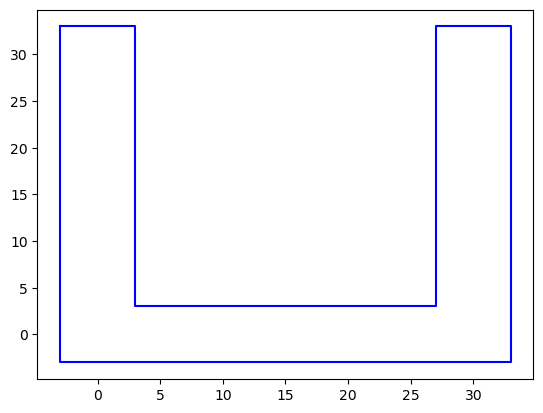

In [54]:
plt.plot(u_shaped_corridor_polygon.exterior.xy[0], u_shaped_corridor_polygon.exterior.xy[1], color="blue", label="U-shaped corridor shell")

In [55]:
mesh_env = Environment.from_layout(
    kind="TriangularMesh",
    layout_params={"boundary_polygon": u_shaped_corridor_polygon, "point_spacing": 1.0},
)

(-5.0, 35.0)

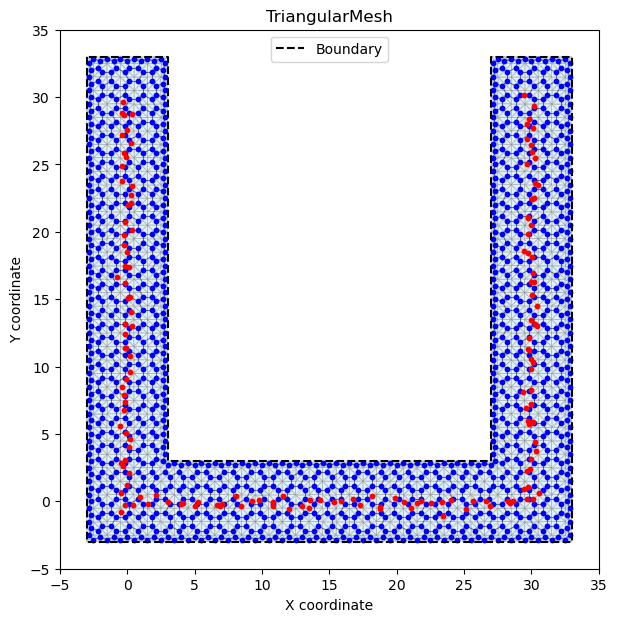

In [56]:
mesh_env.plot(show_connectivity=True, show_centroids=True)
plt.scatter(position[:, 0], position[:, 1], color="red", s=10, zorder=10)
plt.xlim(-5, 35)
plt.ylim(-5, 35)

In [57]:
mesh_env.edge_attributes

distance                                       vector  \
source_bin target_bin                                                          
0          50          0.471405     (0.3333333333333335, 0.3333333333333357)   
           11          0.527046                  (0.16666666666666696, -0.5)   
1          258         0.527046                   (0.5, 0.16666666666666696)   
           37          0.527046                  (-0.5, 0.16666666666666696)   
           404         0.527046                 (-0.16666666666666607, -0.5)   
...                         ...                                          ...   
1348       1352        0.666667                   (-0.6666666666666643, 0.0)   
           1349        0.471405    (0.3333333333333357, 0.33333333333333337)   
1350       1351        0.471405  (-0.3333333333333357, -0.33333333333333326)   
1351       1353        0.666667                   (0.0, -0.6666666666666665)   
1352       1353        0.471405   (-0.3333333333333357, 0.33333333333333337)   

                       angle_2d  
source_bin target_bin            
0          50          0.785398  
           11         -1.249046  
1          258         0.321751  
           37          2.819842  
           404        -1.892547  
...                         ...  
1348       1352        3.141593  
           1349        0.785398  
1350       1351       -2.356194  
1351       1353       -1.570796  
1352       1353        2.356194  

[1929 rows x 3 columns]

In [58]:
mesh_env.edge_attributes.distance

source_bin  target_bin
0           50            0.471405
            11            0.527046
1           258           0.527046
            37            0.527046
            404           0.527046
                            ...   
1348        1352          0.666667
            1349          0.471405
1350        1351          0.471405
1351        1353          0.666667
1352        1353          0.471405
Name: distance, Length: 1929, dtype: float64

In [59]:
import scipy.sparse


def _gaussian_weighted_adjacency(env: Environment, bandwidth_sigma: float) -> scipy.sparse.coo_matrix:
    """
    Create a sparse adjacency matrix with Gaussian weights based on distances between bins.

    Parameters
    ----------
    env : Environment
        The environment containing the edge attributes with distances.
    bandwidth_sigma : float, optional
        The standard deviation for the Gaussian kernel

    Returns
    -------
    scipy.sparse.coo_matrix
        A sparse matrix representing the Gaussian kernel weights between bins.
    """
    n_bins = env.n_bins
    two_sigma_sq = 2.0 * (bandwidth_sigma**2)

    source_nodes = env.edge_attributes.index.get_level_values("source_bin").to_numpy()
    target_nodes = env.edge_attributes.index.get_level_values("target_bin").to_numpy()

    gaussian_weights = np.exp(-(env.edge_attributes.distance.to_numpy()**2) / two_sigma_sq)

    return scipy.sparse.coo_matrix(
        (gaussian_weights, (source_nodes, target_nodes)),
        shape=(n_bins, n_bins)
    )


sparse_gaussian_kernel = _gaussian_weighted_adjacency(mesh_env, 2.0)
sparse_gaussian_kernel

<COOrdinate sparse matrix of dtype 'float64'
	with 1929 stored elements and shape (1354, 1354)>

In [60]:
sparse_gaussian_kernel.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.94595947],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.97260448],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [61]:
import networkx as nx

nx.adjacency_matrix(mesh_env.connectivity, weight="distance")

<Compressed Sparse Row sparse array of dtype 'float64'
	with 3858 stored elements and shape (1354, 1354)>

In [62]:
nx.laplacian_matrix(mesh_env.connectivity, weight="distance")

<Compressed Sparse Row sparse array of dtype 'float64'
	with 5212 stored elements and shape (1354, 1354)>

In [63]:
mesh_env.bin_sizes

array([0.25, 0.25, 0.25, ..., 0.5 , 0.5 , 0.5 ])

(-5.0, 35.0)

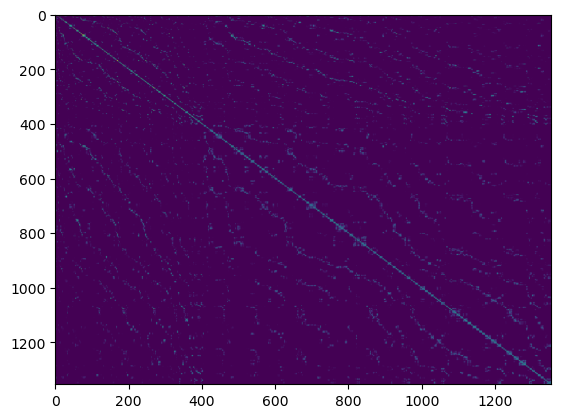

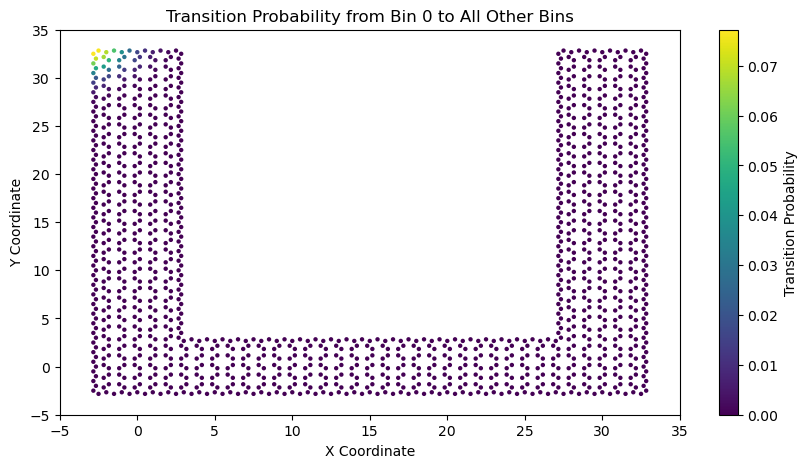

In [64]:
from non_local_detector.diffusion_kernels import compute_diffusion_kernels

kernel = compute_diffusion_kernels(
    graph=mesh_env.connectivity,
    bandwidth_sigma=2.0,
    bin_sizes=mesh_env.bin_sizes,
    mode="transition"
)

plt.imshow(kernel, cmap="viridis", aspect="auto")
plt.figure(figsize=(10, 5))
plt.scatter(
    mesh_env.bin_centers[:, 0],
    mesh_env.bin_centers[:, 1],
    c=kernel[0, :],
    s=10,
    cmap="viridis",
    edgecolor="none",
)
plt.colorbar(label="Transition Probability")
plt.title("Transition Probability from Bin 0 to All Other Bins")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.xlim(-5, 35)
plt.ylim(-5, 35)

<Axes: title={'center': 'Data Distribution over TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

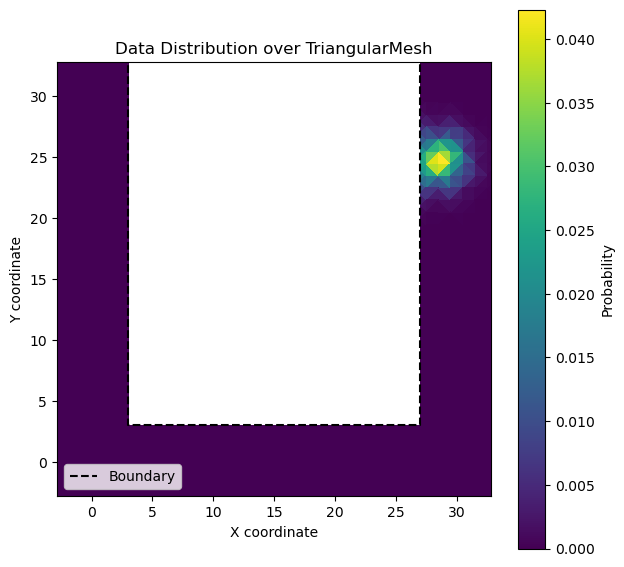

In [65]:
from typing import Any, Dict, List, Optional, Sequence, Tuple, Union

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon as MplPolygon
import numpy as np
from numpy.typing import NDArray
import networkx as nx  # Only if you intend to plot connectivity graph too
from non_local_detector.environment.layout import TriangularMeshLayout

def plot_triangular_mesh_distribution(
    layout: TriangularMeshLayout,
    data_values: NDArray[np.float64],
    ax: Optional[plt.Axes] = None,
    cmap: Union[str, mcolors.Colormap] = "viridis",
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    show_colorbar: bool = True,
    colorbar_label: str = "Probability",
    triangle_style_kwargs: Optional[Dict[str, Any]] = None,
    boundary_kwargs: Optional[Dict[str, Any]] = None,
    show_boundary: bool = True,
) -> plt.Axes:
    """
    Plots a probability distribution (or other scalar data) over a
    TriangularMeshLayout using a colormap.

    Parameters
    ----------
    layout : TriangularMeshLayout
        An initialized and built instance of the TriangularMeshLayout.
    data_values : NDArray[np.float64], shape (n_active_triangles,)
        Scalar data associated with each active triangle (e.g., probabilities).
    ax : Optional[matplotlib.axes.Axes], optional
        Axes to plot on. If None, a new figure and axes are created.
    cmap : Union[str, matplotlib.colors.Colormap], optional
        Colormap to use for the data. Defaults to 'viridis'.
    vmin : Optional[float], optional
        Minimum data value for colormap scaling. If None, inferred from data_values.
    vmax : Optional[float], optional
        Maximum data value for colormap scaling. If None, inferred from data_values.
    show_colorbar : bool, optional
        If True, a colorbar is added to the plot. Defaults to True.
    colorbar_label : str, optional
        Label for the colorbar. Defaults to "Probability".
    triangle_style_kwargs : Optional[Dict[str, Any]], optional
        Keyword arguments for styling the triangle patches (e.g., edgecolor,
        linewidth, alpha). `facecolor` will be overridden by the colormap.
    boundary_kwargs : Optional[Dict[str, Any]], optional
        Keyword arguments for plotting the boundary polygon.
    show_boundary : bool, optional
        Whether to draw the original boundary polygon. Defaults to True.

    Returns
    -------
    matplotlib.axes.Axes
        The axes on which the distribution was plotted.

    Raises
    ------
    RuntimeError
        If the layout object is not properly built.
    ValueError
        If the length of `data_values` does not match the number of
        active triangles in the layout.
    """
    if (
        layout._full_delaunay_tri is None
        or layout._active_original_simplex_indices is None
        or layout.bin_centers is None  # Used for count of active bins
        or layout.dimension_ranges is None
    ):  # pragma: no cover
        raise RuntimeError(
            "TriangularMeshLayout is not built. Call layout.build() first."
        )

    n_active_triangles = layout.bin_centers.shape[0]
    if len(data_values) != n_active_triangles:  # pragma: no cover
        raise ValueError(
            f"Length of data_values ({len(data_values)}) must match "
            f"the number of active triangles ({n_active_triangles})."
        )

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))  # Default figsize
    else:
        fig = ax.get_figure()

    # Prepare triangle patches
    patches: List[MplPolygon] = []
    # Accessing potentially "private" attributes for geometry:
    mesh_points = layout._full_delaunay_tri.points
    active_simplices_vertices = mesh_points[
        layout._full_delaunay_tri.simplices[layout._active_original_simplex_indices]
    ]

    for vertices in active_simplices_vertices:
        patches.append(MplPolygon(vertices, closed=True))

    # Define default styling for triangles (edge, alpha, etc.)
    # Facecolor will be determined by data_values and cmap
    default_triangle_styles = {
        "edgecolor": "none",
        "linewidth": 0.0,
        "alpha": 1.0,
        "antialiased": False,
    }
    if triangle_style_kwargs:
        default_triangle_styles.update(triangle_style_kwargs)

    # Create PatchCollection
    patch_collection = PatchCollection(patches, **default_triangle_styles)
    patch_collection.set_array(data_values)
    patch_collection.set_cmap(cmap)

    # Set color limits
    if vmin is not None or vmax is not None:
        patch_collection.set_clim(vmin, vmax)
    elif len(data_values) > 0:  # Autoscale if not set and data exists
        patch_collection.set_clim(np.nanmin(data_values), np.nanmax(data_values))

    ax.add_collection(patch_collection)

    # Plot boundary polygon
    if show_boundary and layout._boundary_polygon_stored:
        default_boundary_styles = {
            "color": "black",
            "linewidth": 1.5,
            "linestyle": "--",
            "zorder": 4,
            "label": "Boundary",
        }
        if boundary_kwargs:
            default_boundary_styles.update(boundary_kwargs)

        xb, yb = layout._boundary_polygon_stored.exterior.xy
        ax.plot(xb, yb, **default_boundary_styles)
        for interior in layout._boundary_polygon_stored.interiors:
            xbi, ybi = interior.xy
            ax.plot(xbi, ybi, **default_boundary_styles)
        # Avoid duplicate labels if called multiple times with interiors
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())

    # Set plot properties
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(layout.dimension_ranges[0])
    ax.set_ylim(layout.dimension_ranges[1])
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.set_title(f"Data Distribution over {layout._layout_type_tag}")

    # Add colorbar
    if show_colorbar:
        cbar = fig.colorbar(patch_collection, ax=ax, orientation="vertical")
        cbar.set_label(colorbar_label)

    return ax

plot_triangular_mesh_distribution(mesh_env.layout, data_values=kernel[1000, :])

In [66]:
from non_local_detector.environment.regions.ops import (
    regions_containing_points,
    points_in_any_region,
)

regions_containing_points(
    pts=hex_env.bin_centers,
    regions=hex_env.regions,
)

,test_region,polygon_region,polygon_region2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
62,False,False,False
63,False,False,False
64,False,False,False
65,False,False,False


In [67]:
regions_containing_points(
    pts=hex_env.bin_centers,
    regions=hex_env.regions,
    region_names=["polygon_region", "polygon_region2"],
)

,polygon_region,polygon_region2
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
62,False,False
63,False,False
64,False,False
65,False,False


In [68]:
df = regions_containing_points(
    pts=hex_env.bin_centers,
    regions=hex_env.regions,
    return_dataframe=True,
)
df

,test_region,polygon_region,polygon_region2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
62,False,False,False
63,False,False,False
64,False,False,False
65,False,False,False


In [69]:
is_in_region = points_in_any_region(
    pts=hex_env.bin_centers,
    regions=hex_env.regions,
)
is_in_region

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [70]:
df.iloc[is_in_region].any(axis=1)

0     True
1     True
2     True
3     True
4     True
14    True
15    True
16    True
17    True
29    True
31    True
33    True
35    True
37    True
dtype: bool

In [71]:
df.iloc[~is_in_region].any(axis=1)

5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
30    False
32    False
34    False
36    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
dtype: bool

In [72]:
import shapely
from shapely import Polygon, points

shapely.contains_xy(hex_env.regions["polygon_region"].data, hex_env.bin_centers[:, 0], hex_env.bin_centers[:, 1])

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [75]:
shapely.contains_xy(
    hex_env.regions["polygon_region"].data,
    hex_env.bin_centers[:, 0],
    hex_env.bin_centers[:, 1],
)

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
shapely.covers(
    hex_env.regions["polygon_region"].data,
    points(hex_env.bin_centers),
)